Neural net for predicting fraudulent transactions using Kaggle Fraudulent Transactions Data (https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download).

Importing necessary librarys.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
import scipy as sp

Downloading data

In [3]:
df=pd.read_csv('C:/Users/T440s/Kaggle/archive/fraudulent_transaction_data.csv')

Getting to know the data set.

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
'Number of cases where transaction originator is not Customer: {}'.format(len(df[df["nameOrig"].str.get(0) != "C"]))

'Number of cases where transaction originator is not Customer: 0'

Dataset doesn't have any missing data fields. Balance is missing for Merchant type persons. Merchants only on the Dest side.

Let's use this plot from the internet to illustrate how a model is performing.

In [7]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

First lets try very simple linear model. One input variable `amount` and one level in the neural net. Will use `isFraud` as the label.

In [8]:
X = df[["amount"]]
y = df[["isFraud"]]

In [9]:
"X dtypes: {}, y dtypes: {}".format(X.dtypes,y.dtypes)

'X dtypes: amount    float64\ndtype: object, y dtypes: isFraud    int64\ndtype: object'

Split data into training and valuation set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Defining simple model using just one layer.

In [11]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

In [12]:
dense = tf.keras.layers.Dense(1,activation = 'sigmoid')

In [13]:
outputs = dense(inputs)

In [14]:
simple_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="simple_model")

In [15]:
simple_model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
simple_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(reduction="sum_over_batch_size", name="binary_crossentropy"),
    #tf.keras.losses.MeanSquaredError(reduction="sum_over_batch_size", name="mean_squared_error"),#mean_squared_error
    optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error"),
            tf.keras.metrics.Recall(name="recall"),
            tf.keras.metrics.Precision(name="precision")]#[tf.keras.metrics.SparseCategoricalAccuracy()],
)

Running the model for 10 epochs. In this case I don't expect it to do well, because amount is not enough, but it's good to get the initial setup running.

In [19]:
history = simple_model.fit(X_train, y_train, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10

15907/15907 [==============================] - 33s 2ms/step - loss: 65.9741 - root_mean_squared_error: 0.1686 - recall: 0.0298 - precision: 0.0014 - val_loss: 43.9474 - val_root_mean_squared_error: 0.0357 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
15907/15907 [==============================] - 32s 2ms/step - loss: 68.8670 - root_mean_squared_error: 0.1629 - recall: 0.0342 - precision: 0.0017 - val_loss: 5.3604 - val_root_mean_squared_error: 0.0357 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/10
15907/15907 [==============================] - 60s 4ms/step - loss: 67.0786 - root_mean_squared_error: 0.1578 - recall: 0.0287 - precision: 0.0016 - val_loss: 26.7695 - val_root_mean_squared_error: 0.0357 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/10
15907/15907 [==============================] - 51s 3ms/step - loss: 67.2667 - root_mean_squared_error: 0.1553 - recall: 0.0279 - precision: 0.0016 - val_loss: 20.6916 - val_root_mean

Lets see how the model is performing based on the defined metrics.

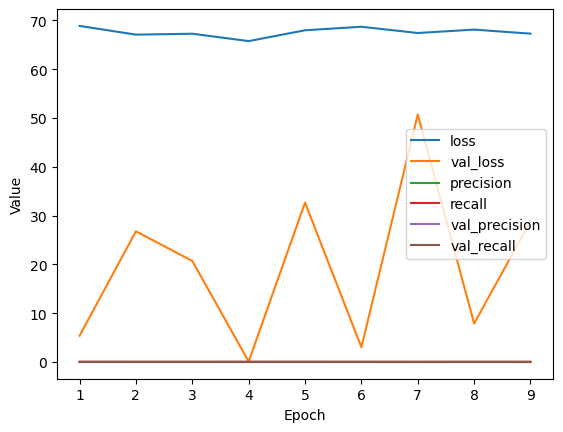

In [20]:
list_of_metrics_to_plot = ['loss','val_loss','precision','recall','val_precision','val_recall']
plot_curve(history.epoch, pd.DataFrame(history.history), list_of_metrics_to_plot)

Based on these results, it seems like the model is predicting every value to be very close to zero. This is understandable, as our model is very unbalanced. The model doesn't seem to be getting better with time, as it can't find a better approach than just predicting everything as close to 0 just using amount. Valuation loss has a lot of randomness, probably because small changes in weights contribute to large changes in FN loss.

In [21]:
test_scores = simple_model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test root mean squared error:", test_scores[1])

39767/39767 - 45s - loss: 27.3434 - root_mean_squared_error: 0.0357 - recall: 0.0000e+00 - precision: 0.0000e+00 - 45s/epoch - 1ms/step
Test loss: 27.343358993530273
Test root mean squared error: 0.03567997366189957


### Feature engineering

Next up, we'll be adding additional parameters to our model, but for that we have to change them a little bit.

##### `step`
We will leave this out for now, as it seems to be a strong but not most realistic predictor (most of the fraud takes place in low steps.

##### `type`
This categorical value needs to be formated to use in the model. We'll use one hot encoding.

##### `amount`
As we now have other attributes in the model, `amount` should be normalised.

##### `nameOrig`
We'll discard this for now.

##### `oldbalanceOrg`
Will rename it to  `oldbalanceOrig` and normalize.

##### `newbalanceOrig`
Have to normalize this.

##### `nameDest`
We'll discard this for now, but calculate new features `customerDest` (1 if C) and `merchantDest` (1 if M).

##### `oldbalanceDest`
Have to normalize this. As the balance is 0 for all merchants, as it is unknown, other substitutes should be considered.

##### `newbalanceDest`
Have to normalize this. As the balance is 0 for all merchants, as it is unknown, other substitutes should be considered.


Again, will use `isFraud` as the label.

In [22]:
X = df[["type","amount","oldbalanceOrg","newbalanceOrig","nameDest","oldbalanceDest","newbalanceDest"]]
X = X.rename(columns={"oldbalanceOrg": "oldbalanceOrig"})
X["customerDest"] = (X["nameDest"].str.get(0) == "C").astype(float)
X["merchantDest"] = (X["nameDest"].str.get(0) == "M").astype(float)
X = X.drop(columns=["nameDest"])
y = df[["isFraud"]]

In [23]:
X.head()

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,customerDest,merchantDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,1.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,1.0


In [24]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(X[["type"]])
#one_hot_encoder.fit(X)

colors_df_encoded = one_hot_encoder.transform(X[["type"]])
colors_df_encoded = pd.DataFrame(data=colors_df_encoded, columns=one_hot_encoder.categories_)

In [25]:
X = pd.concat([X, colors_df_encoded], axis=1)
X = X.drop(columns=["type"])
X.head()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,customerDest,merchantDest,"(CASH_IN,)","(CASH_OUT,)","(DEBIT,)","(PAYMENT,)","(TRANSFER,)"
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [ ]:
amount_a = np.mean(X_train["amount"])
amount_sd = np.std(X_train["amount"])
newBalanceOrig_a = np.mean(X_train["newbalanceOrig"])
newBalanceOrig_sd = np.std(X_train["newbalanceOrig"])
oldBalanceOrig_a = np.mean(X_train["oldbalanceOrig"])
oldBalanceOrig_sd = np.std(X_train["oldbalanceOrig"])
newBalanceDest_a = np.mean(X_train["newbalanceDest"])
newBalanceDest_sd = np.std(X_train["newbalanceDest"])
oldBalanceDest_a = np.mean(X_train["oldbalanceDest"])
oldBalanceDest_sd = np.std(X_train["oldbalanceDest"])

print("""Avg amount: {:.2f}, Std amount {:.2f}
Avg newBalanceOrig: {:.2f}, Std newBalanceOrig: {:.2f}
Avg oldBalanceOrig: {:.2f}, Std oldBalanceOrig: {:.2f}
Avg newBalanceDest: {:.2f}, Std newBalanceDest: {:.2f}
Avg oldBalanceDest: {:.2f}, Std oldBalanceDest: {:.2f}
""".format(amount_a,amount_sd,
           newBalanceOrig_a,newBalanceOrig_sd,
           oldBalanceOrig_a,oldBalanceOrig_sd,
           newBalanceDest_a,newBalanceDest_sd,
           oldBalanceDest_a,oldBalanceDest_sd))

Lets define a function that normalises our variables so that we can use it later for testing.

In [ ]:
#We'll ignore the 0 in place of missing values for now and come back to it later.
def normalise_X (X):
    X["amount"] = (X["amount"]-amount_a)/amount_a
    X["newbalanceOrig"] = (X["newbalanceOrig"]-newBalanceOrig_a)/newBalanceOrig_sd
    X["oldbalanceOrig"] = (X["oldbalanceOrig"]-oldBalanceOrig_a)/oldBalanceOrig_sd
    X["newbalanceDest"] = (X["newbalanceDest"]-newBalanceDest_a)/newBalanceDest_sd
    X["oldbalanceDest"] = (X["oldbalanceDest"]-oldBalanceDest_a)/oldBalanceDest_sd
    return (X)

In [ ]:
X_train = normalise_X(X_train)

Lets try to use a model analogous to the `simple_model` we used earlier to see the effects new attributes have.

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
dense = tf.keras.layers.Dense(1,activation = 'sigmoid')
outputs = dense(inputs)
simple_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="simple_model")
simple_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(reduction="sum_over_batch_size", name="binary_crossentropy"),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error"),
            tf.keras.metrics.Recall(name="recall"),
            tf.keras.metrics.Precision(name="precision")]
)
simple_model.summary()

In [ ]:
history = simple_model.fit(X_train, y_train, batch_size=256, epochs=10, validation_split=0.2)

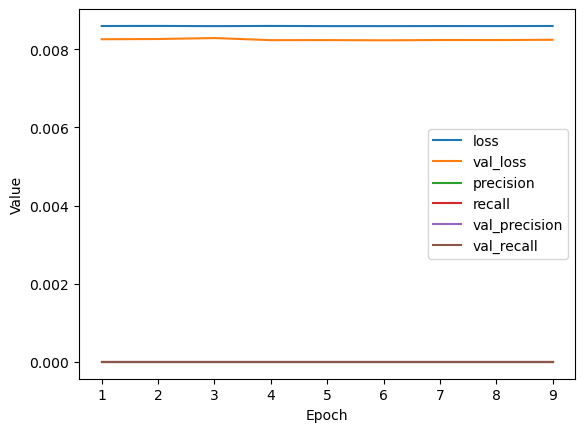

In [307]:
list_of_metrics_to_plot = ['loss','val_loss','precision','recall','val_precision','val_recall']
plot_curve(history.epoch, pd.DataFrame(history.history), list_of_metrics_to_plot)

In [31]:
test_scores = simple_model.evaluate(normalise_X(X_test), y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test root mean squared error:", test_scores[1])

39767/39767 - 48s - loss: 0.8070 - root_mean_squared_error: 0.5548 - recall: 0.3052 - precision: 5.7998e-04 - 48s/epoch - 1ms/step
Test loss: 0.806956946849823
Test root mean squared error: 0.5548227429389954


Compared to previous model, loss has come down significantly, from 44.583 to 0.125, but we can see that precision and recall are still 0, which means the model is still predicting everything as zero. Presumably the estimated label is just higher.

To combat that, we should reduce the bias in training data. As there are quite few positive examples but a lot of data overall, it seems a good start to try undersampling.

In [35]:
neg, pos = np.bincount(y_test["isFraud"])
total = neg + pos
print("Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n".format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1272524
    Positive: 1681 (0.13% of total)



We'll try to undersample negative examples so that positive examples make up about 10%.

In [85]:
(9*pos)/total

0.01567384495776396

In [89]:
import RandomUnderSampler
#from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'RandomUnderSampler'

In [75]:
y_train_us = y_train.copy()
X_train_us = X_train.copy()
y_train_us["RowID"] = y_train_us.index
X_train_us["RowID"] = X_train_us.index
y_train_us_neg = y_train_us[y_train_us["isFraud"] == 0].sample(frac=(9*pos)/total, random_state=42)

y_train_us = pd.concat([y_train_us[y_train_us["isFraud"] == 1], y_train_us_neg], ignore_index=True)
X_train_us = X_train_us.merge(y_train_us, on="RowID", how="inner").drop(columns=["RowID","isFraud"]).copy()
y_train_us = y_train_us.drop(columns=["RowID"]).copy()

In [76]:
neg, pos = np.bincount(y_train_us["isFraud"])
total = neg + pos
print("Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n".format(
    total, pos, 100 * pos / total))

Examples:
    Total: 3750707
    Positive: 6532 (0.17% of total)



In [77]:
X_train_us.head()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,customerDest,merchantDest,"(CASH_IN,)","(CASH_OUT,)","(DEBIT,)","(PAYMENT,)","(TRANSFER,)"
0,-0.973199,-0.141930,-0.149099,-0.323933,-0.333565,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.873019,-0.283929,-0.292583,-0.201644,-0.214182,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.235675,-0.288862,-0.292583,-0.213712,-0.194171,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.855080,-0.288862,-0.292583,-0.323933,-0.333565,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.752390,-0.264737,-0.283970,-0.134450,-0.146097,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [81]:
y_train_us.head()

,isFraud
0,1
1,1
2,1
3,1
4,1


In [83]:
X_train_us.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,customerDest,merchantDest,"(CASH_IN,)","(CASH_OUT,)","(DEBIT,)","(PAYMENT,)","(TRANSFER,)"
count,3.750707e+06,3.750707e+06,3.750707e+06,3.750707e+06,3.750707e+06,3.750707e+06,3.750707e+06,3.750707e+06,3.750707e+06,3.750707e+06,3.750707e+06,3.750707e+06
mean,2.122874e-03,4.223236e-04,1.840729e-04,-4.948530e-04,-4.478328e-04,6.618184e-01,3.381816e-01,2.199337e-01,3.515137e-01,6.494776e-03,3.381816e-01,8.387619e-02
std,3.331887e+00,1.000793e+00,1.000543e+00,9.949616e-01,9.933862e-01,4.730907e-01,4.730907e-01,4.142016e-01,4.774431e-01,8.032805e-02,4.730907e-01,2.772021e-01
min,-1.000000e+00,-2.888620e-01,-2.925825e-01,-3.239330e-01,-3.335649e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-9.255368e-01,-2.888620e-01,-2.925825e-01,-3.239330e-01,-3.335649e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-5.833226e-01,-2.839064e-01,-2.925825e-01,-2.850311e-01,-2.752343e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.611817e-01,-2.516280e-01,-2.432537e-01,-4.685111e-02,-3.107595e-02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,5.134086e+02,1.955415e+01,1.588755e+01,1.043966e+02,9.662350e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [84]:
y_train_us.describe()

,isFraud
count,3.750707e+06
mean,1.741538e-03
std,4.169539e-02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [90]:
X_wr = X_train_us.copy()
y_wr = y_train_us.copy()

In [92]:
history = simple_model.fit(X_train, y_train, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
15900/15907 [============================>.] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [62]:
list_of_metrics_to_plot = ['loss','val_loss','precision','recall','val_precision','val_recall']
plot_curve(history.epoch, pd.DataFrame(history.history), list_of_metrics_to_plot)

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
